In [3]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential,load_model
from tensorflow.keras.layers import LSTM, GRU, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import tensorflow as tf
import matplotlib.pyplot as plt

In [4]:
# Supongamos que 'data' es el DataFrame cargado con las columnas descritas
data=pd.read_csv('../../Data/Limpio/dataset_limpio_parte1.csv')
data1=pd.read_csv('../../Data/Limpio/dataset_limpio_parte2.csv')
data2=pd.read_csv('../../Data/Limpio/dataset_limpio_parte3.csv')
data_unida=pd.concat([data,data1,data2]) # Ajusta el nombre del archivo según corresponda
data_unida.head()

C:\Users\jaime\AppData\Local\Temp\ipykernel_32128\848381883.py:2: DtypeWarning: Columns (4,8) have mixed types. Specify dtype option on import or set low_memory=False.
  data=pd.read_csv('../../Data/Limpio/dataset_limpio_parte1.csv')
C:\Users\jaime\AppData\Local\Temp\ipykernel_32128\848381883.py:3: DtypeWarning: Columns (4,8) have mixed types. Specify dtype option on import or set low_memory=False.
  data1=pd.read_csv('../../Data/Limpio/dataset_limpio_parte2.csv')
C:\Users\jaime\AppData\Local\Temp\ipykernel_32128\848381883.py:4: DtypeWarning: Columns (4,8) have mixed types. Specify dtype option on import or set low_memory=False.
  data2=pd.read_csv('../../Data/Limpio/dataset_limpio_parte3.csv')


,cod_persona,mes,pais,sexo,edad,fecha1,xti_empleado,xti_nuevo_cliente,num_antiguedad,xti_rel,...,ind_prod16,ind_prod17,ind_prod18,ind_prod19,ind_prod20,ind_prod21,ind_prod22,ind_prod23,ind_prod24,ind_prod25
0,5514,2016-04-28,ES,H,44,2016-04-29,N,1.0,0,1.0,...,0,0,0,0,0,0,0.0,0.0,0,0
1,5541,2016-04-28,ES,H,60,2016-04-29,N,1.0,0,1.0,...,0,0,0,0,0,0,0.0,0.0,0,0
2,5631,2016-04-28,ES,V,53,2016-04-28,N,1.0,0,1.0,...,0,0,0,0,0,0,0.0,0.0,0,0
3,5656,2016-04-28,ES,H,47,2016-04-28,N,1.0,0,1.0,...,0,0,0,0,0,0,0.0,0.0,0,0
4,5738,2016-04-28,ES,V,48,2016-04-28,N,1.0,0,1.0,...,0,0,0,0,0,0,0.0,0.0,0,0


In [5]:
data_unida.isna().sum()

cod_persona               0
mes                       0
pais                      0
sexo                      0
edad                      0
fecha1                   56
xti_empleado             56
xti_nuevo_cliente        56
num_antiguedad            0
xti_rel                  56
tip_rel_1mes              0
indresi                  56
indext                   56
des_canal                56
xti_extra                56
tip_dom                  56
cod_provincia             0
xti_actividad_cliente    56
imp_renta                 0
id_segmento               0
mean_engagement           0
ind_prod1                 0
ind_prod2                 0
ind_prod3                 0
ind_prod4                 0
ind_prod5                 0
ind_prod6                 0
ind_prod7                 0
ind_prod8                 0
ind_prod9                 0
ind_prod10                0
ind_prod11                0
ind_prod12                0
ind_prod13                0
ind_prod14                0
ind_prod15          

In [6]:
#Separamos las variables en categóricas y numéricas
cat=[]
num=[]
for i in data_unida.columns:
  if data_unida[i].dtype=='object':
    cat.append(i)
  else:
    num.append(i)
print('cat = ',cat)
print('num = ',num)

cat =  ['mes', 'pais', 'sexo', 'edad', 'fecha1', 'xti_empleado', 'num_antiguedad', 'tip_rel_1mes', 'indresi', 'indext', 'des_canal', 'xti_extra', 'id_segmento']
num =  ['cod_persona', 'xti_nuevo_cliente', 'xti_rel', 'tip_dom', 'cod_provincia', 'xti_actividad_cliente', 'imp_renta', 'mean_engagement', 'ind_prod1', 'ind_prod2', 'ind_prod3', 'ind_prod4', 'ind_prod5', 'ind_prod6', 'ind_prod7', 'ind_prod8', 'ind_prod9', 'ind_prod10', 'ind_prod11', 'ind_prod12', 'ind_prod13', 'ind_prod14', 'ind_prod15', 'ind_prod16', 'ind_prod17', 'ind_prod18', 'ind_prod19', 'ind_prod20', 'ind_prod21', 'ind_prod22', 'ind_prod23', 'ind_prod24', 'ind_prod25']


In [7]:
import matplotlib.pyplot as plt


Descripcion de la variable  mes
--------------------------------------------------
Categorías:
mes
2016-04-28    46776
2016-03-28    46549
2016-02-28    46287
2016-01-28    45994
2015-12-28    45675
2015-11-28    45309
2015-10-28    44574
2015-09-28    43170
2015-08-28    42016
2015-07-28    41342
2015-06-28    31429
2015-05-28    31336
2015-04-28    31250
2015-03-28    31138
2015-02-28    30988
2015-01-28    30849
Name: count, dtype: int64
Número de categorias:  16


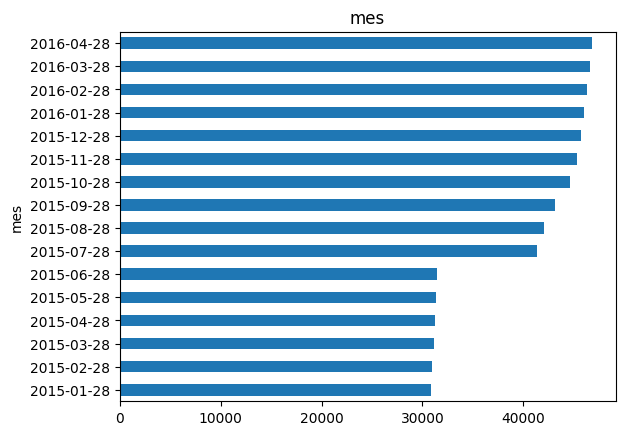


Descripcion de la variable  pais
--------------------------------------------------
Categorías:
pais
ES    631792
DE       285
GB       244
FR       224
US       203
CH       192
CO       160
AR       144
IT       138
MX       122
RO       104
EC        90
VE        80
CL        74
PY        74
BE        64
BR        52
AT        48
CA        48
NL        32
CN        32
PL        32
FI        32
BG        32
PE        32
BO        26
CU        16
UA        16
GE        16
PA        16
NG        16
NZ        16
JP        16
AD        16
SE        16
GN        16
IL        16
SA        16
PR        16
PK        16
GT        16
PT        16
SV        16
IN        16
AU        11
RU        10
MD        10
HU         7
Name: count, dtype: int64
Número de categorias:  48


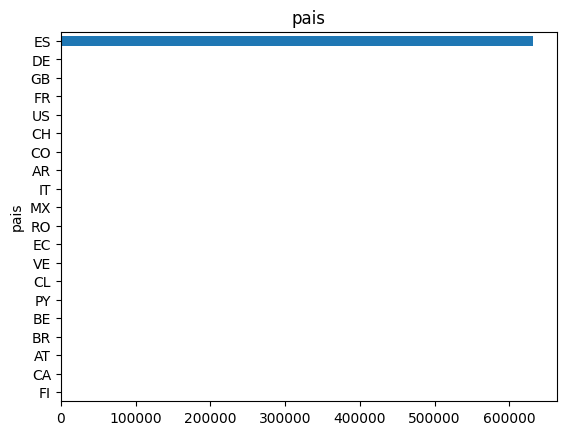


Descripcion de la variable  sexo
--------------------------------------------------
Categorías:
sexo
V    346910
H    287772
Name: count, dtype: int64
Número de categorias:  2


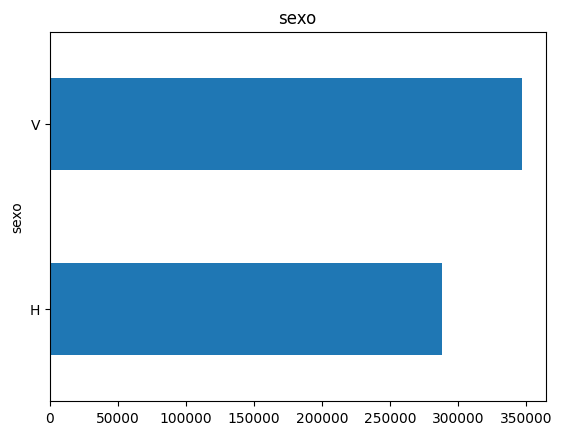


Descripcion de la variable  edad
--------------------------------------------------
Categorías:
edad
23     28375
24     27347
22     22087
25     16441
20     16441
       ...  
108        8
104        7
106        6
  4        6
105        4
Name: count, Length: 312, dtype: int64
Número de categorias:  312


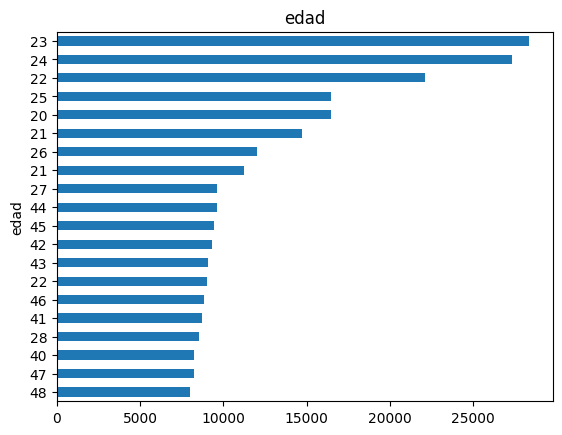


Descripcion de la variable  fecha1
--------------------------------------------------
Categorías:
fecha1
2014-10-03    2907
2014-07-28    2516
2014-08-04    2385
2013-10-14    2046
2012-08-03    1443
              ... 
2016-03-19       2
2008-06-07       2
2016-04-17       1
2016-04-16       1
2016-04-09       1
Name: count, Length: 5796, dtype: int64
Número de categorias:  5796


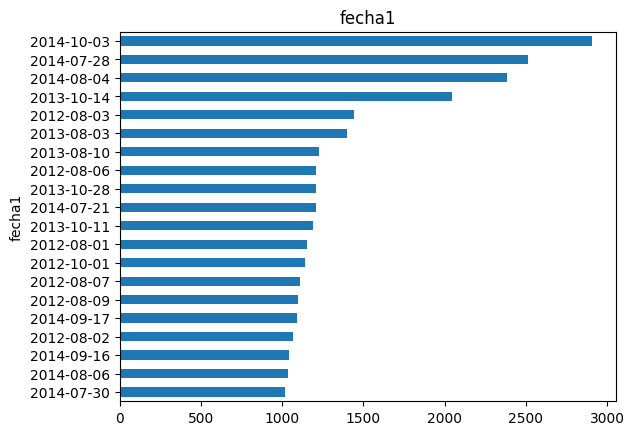


Descripcion de la variable  xti_empleado
--------------------------------------------------
Categorías:
xti_empleado
N    634158
A       202
B       170
F        96
Name: count, dtype: int64
Número de categorias:  4


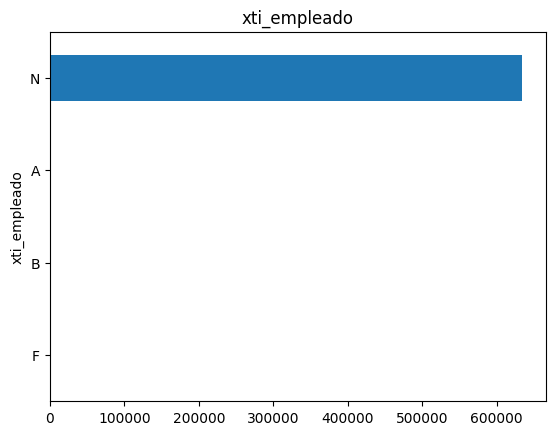


Descripcion de la variable  num_antiguedad
--------------------------------------------------
Categorías:
num_antiguedad
21         7884
33         7025
45         6901
10         6705
35         6591
           ... 
248           2
      1       1
250           1
251           1
252           1
Name: count, Length: 748, dtype: int64
Número de categorias:  748


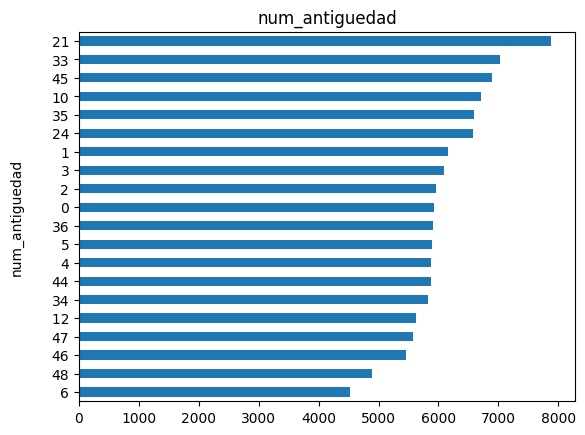


Descripcion de la variable  tip_rel_1mes
--------------------------------------------------
Categorías:
tip_rel_1mes
I    340711
A    288119
N      5642
P       171
R        39
Name: count, dtype: int64
Número de categorias:  5


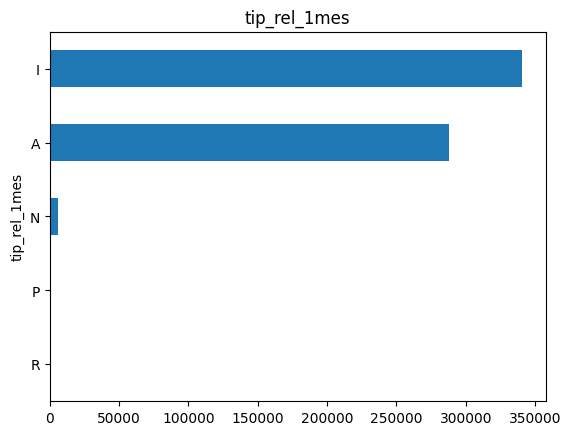


Descripcion de la variable  indresi
--------------------------------------------------
Categorías:
indresi
S    631736
N      2890
Name: count, dtype: int64
Número de categorias:  2


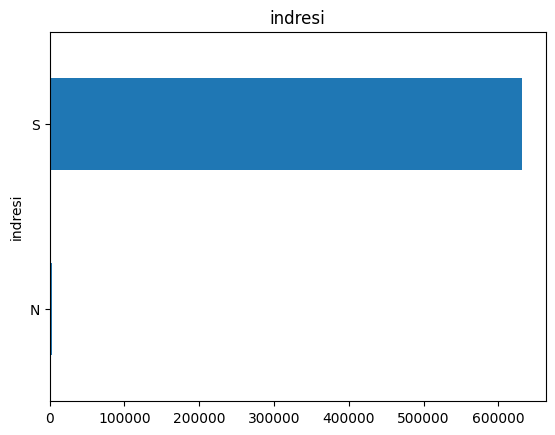


Descripcion de la variable  indext
--------------------------------------------------
Categorías:
indext
N    604219
S     30407
Name: count, dtype: int64
Número de categorias:  2


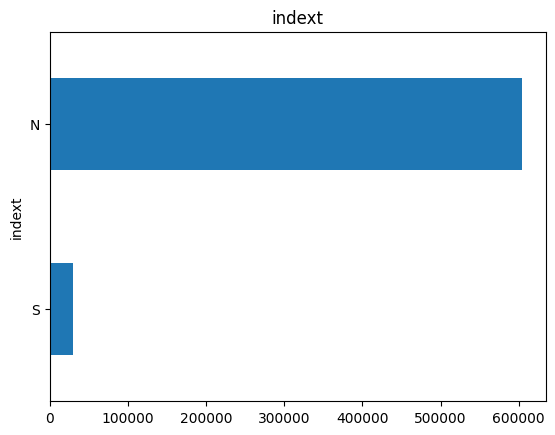


Descripcion de la variable  des_canal
--------------------------------------------------
Categorías:
des_canal
KHE    197326
KAT    152054
KFC    147669
KHQ     25773
KFA     18941
        ...  
KCP        10
KDV        10
KFM        10
K00        10
KCO        10
Name: count, Length: 126, dtype: int64
Número de categorias:  126


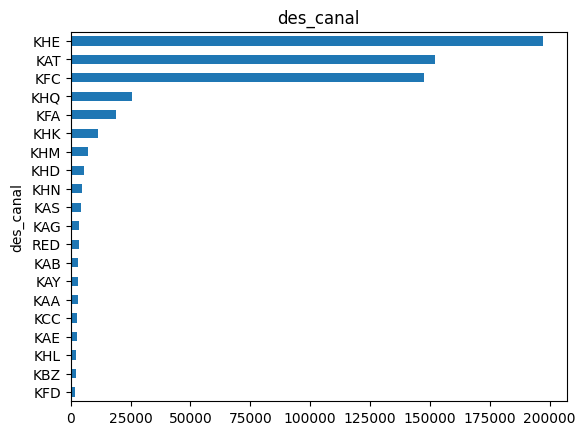


Descripcion de la variable  xti_extra
--------------------------------------------------
Categorías:
xti_extra
N    633108
S      1518
Name: count, dtype: int64
Número de categorias:  2


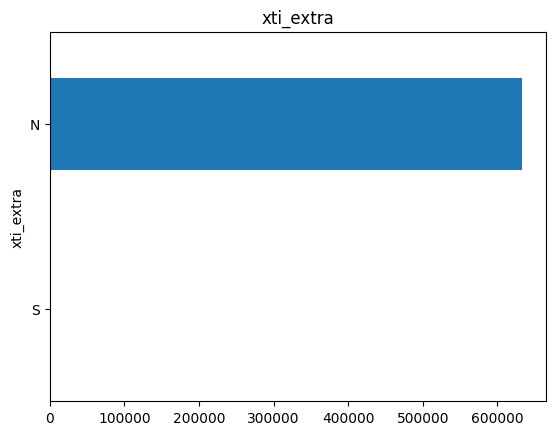


Descripcion de la variable  id_segmento
--------------------------------------------------
Categorías:
id_segmento
02 - PARTICULARES     369955
03 - UNIVERSITARIO    230740
01 - TOP               26584
04-NO TIENE             7403
Name: count, dtype: int64
Número de categorias:  4


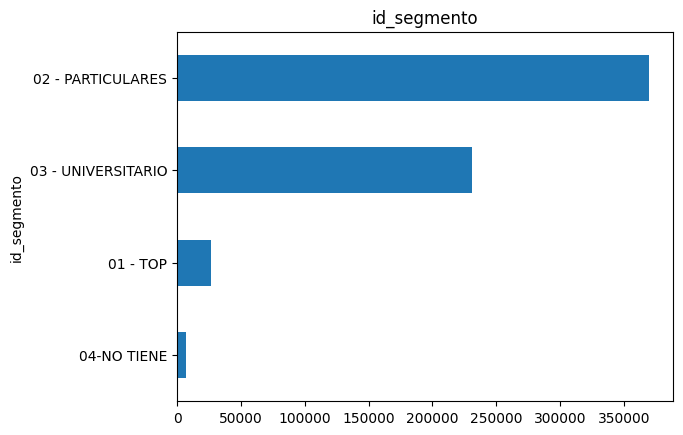

In [8]:
#Visualización variables categóricas
for c in cat:
    print('\nDescripcion de la variable ',c)
    print('-'*50)
    print('Categorías:')
    print(data_unida[c].value_counts())
    print('Número de categorias: ',data_unida[c].nunique())
    data_unida[c].value_counts().sort_values(ascending=True).tail(20).plot(kind='barh')
    plt.title(c)
    plt.show()

In [9]:
fechas = [
    '2015-01-28', '2015-02-28', '2015-03-28', '2015-04-28', 
    '2015-05-28', '2015-06-28', '2015-07-28', '2015-08-28',
    '2015-09-28', '2015-10-28', '2015-11-28', '2015-12-28',
    '2016-01-28', '2016-02-28', '2016-03-28', '2016-04-28'
]

mapeo = {fecha: idx+1 for idx, fecha in enumerate(fechas)}

# Reemplazar los valores de la columna 'mes'
data_unida['mes'] = data_unida['mes'].map(mapeo)

In [10]:
# 1 si es 'ES' 0 si es cualquier otro país
data_unida['pais'] = data_unida['pais'].apply(lambda x: 1 if x == 'ES' else 0)

In [11]:
# 1 si es 'V' 0 si es 'H'
data_unida['sexo'] = data_unida['sexo'].apply(lambda x: 1 if x == 'V' else 0)

In [12]:
data_unida['edad'].unique()

array([44, 60, 53, 47, 48, 22, 25, 36, 21, 28, 43, 65, 30, 40, 39, 35, 38,
       27, 24, 32, 31, 26, 42, 33, 52, 59, 57, 56, 37, 17, 73, 67, 29, 46,
       66, 77, 5, 51, 88, 45, 49, 41, 70, 71, 50, 2, 54, 63, 15, 69, 62,
       23, 64, 58, 34, 20, 75, 90, 74, 3, 16, 8, 7, 61, 14, 72, 13, 84,
       55, 9, 68, 10, 18, 19, 80, 83, 86, 6, 99, 100, 89, 78, 85, 94, 95,
       79, 82, 4, 11, 12, 87, 81, 76, 93, '28', ' 38', '38', ' 54', '54',
       '55', ' 31', '31', ' 37', '37', '27', '24', '25', ' 39', '39',
       '40', ' 40', ' 45', '45', '46', ' 43', '43', '44', ' NA', '22',
       '23', '32', ' 34', '34', '35', ' 27', ' 42', '42', ' 49', '49',
       '50', '36', ' 56', '56', ' 28', '29', ' 55', ' 35', '26', ' 25',
       ' 32', '33', ' 13', '13', '14', ' 30', '30', ' 29', ' 23', '51',
       ' 33', '70', ' 48', '48', ' 67', '67', '68', ' 66', '66', '63',
       '64', ' 21', '21', '58', '59', '62', ' 41', '41', '20', '72', '73',
       ' 46', ' 47', '47', ' 26', ' 36', ' 50', ' 60', 

In [13]:
#Limpieza de la variable edad
mediana=data_unida[(data_unida['edad'] !='NA') & (data_unida['edad']!=' NA')]['edad'].astype(int).median()
data_unida['edad']=data_unida['edad'].apply(lambda x: x if x not in ['NA',' NA'] else f'{mediana}')
data_unida['edad']=data_unida['edad'].astype(float)

In [14]:
data_unida['edad'].unique()

array([ 44.,  60.,  53.,  47.,  48.,  22.,  25.,  36.,  21.,  28.,  43.,
        65.,  30.,  40.,  39.,  35.,  38.,  27.,  24.,  32.,  31.,  26.,
        42.,  33.,  52.,  59.,  57.,  56.,  37.,  17.,  73.,  67.,  29.,
        46.,  66.,  77.,   5.,  51.,  88.,  45.,  49.,  41.,  70.,  71.,
        50.,   2.,  54.,  63.,  15.,  69.,  62.,  23.,  64.,  58.,  34.,
        20.,  75.,  90.,  74.,   3.,  16.,   8.,   7.,  61.,  14.,  72.,
        13.,  84.,  55.,   9.,  68.,  10.,  18.,  19.,  80.,  83.,  86.,
         6.,  99., 100.,  89.,  78.,  85.,  94.,  95.,  79.,  82.,   4.,
        11.,  12.,  87.,  81.,  76.,  93.,  97.,  98.,  91.,  92., 101.,
        96., 102., 103., 104., 107., 108., 105., 106., 109., 110., 117.])

In [15]:
#Transformamos las fechas a enteros
data_unida['fecha1'] = pd.to_datetime(data_unida['fecha1'])
data_unida = data_unida.sort_values('fecha1')
data_unida['fecha_num'] = range(1, len(data_unida) + 1)

In [16]:
data_unida['num_antiguedad'].unique()

array(['254', '252', '251', '250', '249', '248', '246', '    246', '255',
       '253', '247', '245', '    245', '    241', '241', '242', '243',
       '244', '    244', '    243', '233', '237', '234', '235', '236',
       '    229', '238', '232', '229', '230', '231', '    210', '218',
       '     33', '33', '34', '219', '36', '37', '38', '39', '40', '41',
       '35', '42', '217', '216', '215', '214', '212', '213', '210', '211',
       '    242', '151', '155', '154', '153', '152', '150', '    146',
       '148', '147', '146', '149', '156', '157', '    148', '170', '239',
       '171', '240', '169', '168', '167', '166', '165', '164', '    164',
       '172', '173', '    159', '159', '161', '162', '163', '160',
       '     79', '83', '84', '79', '80', '81', '82', '85', '86', '87',
       '88', '    173', '181', '180', '179', '178', '177', '176', '175',
       '182', '174', '    240', '94', '93', '92', '91', '90', '89', '97',
       '96', '95', '185', '184', '186', '187', '189', '190',

In [17]:
#Limpieza de la variable 'num_antiguedad'
mediana_ant=data_unida[(data_unida['num_antiguedad'].str.strip() !='NA') & (data_unida['num_antiguedad']!=' NA')]['num_antiguedad'].astype(int).median()
data_unida['num_antiguedad']=data_unida['num_antiguedad'].apply(lambda x: x if x not in ['NA','     NA'] else f'{mediana_ant}')
data_unida['num_antiguedad']=data_unida['num_antiguedad'].astype(float)

In [18]:
data_unida['num_antiguedad'].unique()

array([254., 252., 251., 250., 249., 248., 246., 255., 253., 247., 245.,
       241., 242., 243., 244., 233., 237., 234., 235., 236., 229., 238.,
       232., 230., 231., 210., 218.,  33.,  34., 219.,  36.,  37.,  38.,
        39.,  40.,  41.,  35.,  42., 217., 216., 215., 214., 212., 213.,
       211., 151., 155., 154., 153., 152., 150., 146., 148., 147., 149.,
       156., 157., 170., 239., 171., 240., 169., 168., 167., 166., 165.,
       164., 172., 173., 159., 161., 162., 163., 160.,  79.,  83.,  84.,
        80.,  81.,  82.,  85.,  86.,  87.,  88., 181., 180., 179., 178.,
       177., 176., 175., 182., 174.,  94.,  93.,  92.,  91.,  90.,  89.,
        97.,  96.,  95., 185., 184., 186., 187., 189., 190., 191., 192.,
       188., 183., 221., 224., 226., 227., 228., 223., 225., 222., 197.,
       198., 199., 200., 204., 202., 203., 205., 201., 196., 220.,  47.,
        53.,  48.,  51.,  52.,  50.,  55.,  54.,  49.,  56.,   8.,   9.,
        10.,  11.,  12.,  13.,  14.,  15.,  16.,  1

In [19]:
# 1 si es 'S' 0 si es 'N'. Variable 'indresi'
data_unida['indresi'] = data_unida['indresi'].apply(lambda x: 1 if x == 'S' else 0)

In [20]:
# 1 si es 'S' 0 si es 'N'. Variable 'indext'
data_unida['indext'] = data_unida['indext'].apply(lambda x: 1 if x == 'S' else 0)

In [21]:
# 1 si es 'S' 0 si es 'N'. Variable 'xti_extra'
data_unida['xti_extra'] = data_unida['xti_extra'].apply(lambda x: 1 if x == 'S' else 0)

In [22]:
columnas_dummy= ['xti_empleado', 'tip_rel_1mes', 'id_segmento']
for columna in columnas_dummy:
    dummys = pd.get_dummies(data_unida[columna], prefix=columna, prefix_sep='_')
    data_unida = pd.concat([data_unida, dummys], axis=1)

# Eliminar las columnas originales
data_unida = data_unida.drop(columnas_dummy, axis=1)

In [23]:
#Labelencoder de la variable 'des_canal'
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
data_unida['des_canal'] = label_encoder.fit_transform(data_unida['des_canal'])


In [24]:
#Separamos las variables en categóricas y numéricas
cat=[]
num=[]
for i in data_unida.columns:
  if data_unida[i].dtype=='object':
    cat.append(i)
  else:
    num.append(i)
print('cat = ',cat)
print('num = ',num)

cat =  []
num =  ['cod_persona', 'mes', 'pais', 'sexo', 'edad', 'fecha1', 'xti_nuevo_cliente', 'num_antiguedad', 'xti_rel', 'indresi', 'indext', 'des_canal', 'xti_extra', 'tip_dom', 'cod_provincia', 'xti_actividad_cliente', 'imp_renta', 'mean_engagement', 'ind_prod1', 'ind_prod2', 'ind_prod3', 'ind_prod4', 'ind_prod5', 'ind_prod6', 'ind_prod7', 'ind_prod8', 'ind_prod9', 'ind_prod10', 'ind_prod11', 'ind_prod12', 'ind_prod13', 'ind_prod14', 'ind_prod15', 'ind_prod16', 'ind_prod17', 'ind_prod18', 'ind_prod19', 'ind_prod20', 'ind_prod21', 'ind_prod22', 'ind_prod23', 'ind_prod24', 'ind_prod25', 'fecha_num', 'xti_empleado_A', 'xti_empleado_B', 'xti_empleado_F', 'xti_empleado_N', 'tip_rel_1mes_A', 'tip_rel_1mes_I', 'tip_rel_1mes_N', 'tip_rel_1mes_P', 'tip_rel_1mes_R', 'id_segmento_01 - TOP', 'id_segmento_02 - PARTICULARES', 'id_segmento_03 - UNIVERSITARIO', 'id_segmento_04-NO TIENE']


In [25]:
data_unida.head()

,cod_persona,mes,pais,sexo,edad,fecha1,xti_nuevo_cliente,num_antiguedad,xti_rel,indresi,...,xti_empleado_N,tip_rel_1mes_A,tip_rel_1mes_I,tip_rel_1mes_N,tip_rel_1mes_P,tip_rel_1mes_R,id_segmento_01 - TOP,id_segmento_02 - PARTICULARES,id_segmento_03 - UNIVERSITARIO,id_segmento_04-NO TIENE
211559,1537800,16,1,1,56.0,1995-01-16,0.0,254.0,1.0,1,...,False,True,False,False,False,False,True,False,False,False
211524,1537717,13,1,1,66.0,1995-01-16,0.0,252.0,1.0,1,...,False,True,False,False,False,False,False,True,False,False
211523,1537717,12,1,1,66.0,1995-01-16,0.0,251.0,1.0,1,...,False,True,False,False,False,False,False,True,False,False
211522,1537717,11,1,1,66.0,1995-01-16,0.0,250.0,1.0,1,...,False,True,False,False,False,False,False,True,False,False
211521,1537717,10,1,1,66.0,1995-01-16,0.0,249.0,1.0,1,...,False,True,False,False,False,False,False,True,False,False


In [26]:
data = data_unida.sort_values(by=['cod_persona', 'fecha1'])
cods_persona=data['cod_persona']
data.drop(['mes','fecha1'],axis=1,inplace=True)

In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from catboost import CatBoostClassifier, Pool
from sklearn.metrics import accuracy_score,recall_score
# Identificar las columnas objetivo y las características
target_columns = [col for col in data.columns if col.startswith('ind_')]
feature_columns = [col for col in data.columns if not col.startswith('ind_')]
target_columns= [target  for target in target_columns if data[target].nunique()>1]

# Separar las características y las etiquetas
numerical_columns = [col for col in feature_columns if pd.api.types.is_numeric_dtype(data[col])]
categorical_columns = [col for col in feature_columns if data[col].dtype == 'object']

X = data[feature_columns]
y = data[target_columns]

# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Asegurar que los conjuntos de entrenamiento y prueba tienen los mismos índices
X_train = X_train.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)


In [28]:
# Inicializar una lista para almacenar los modelos y las predicciones
models = []
y_preds = pd.DataFrame(index=X_test.index)
# Normalizar las características
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [30]:
# Entrenar un modelo para cada columna objetivo
for target in target_columns:
    # Crear un pool de CatBoost
    train_pool = Pool(X_train, y_train[target])
    test_pool = Pool(X_test, y_test[target])

    # Definir el modelo
    model = CatBoostClassifier(iterations=1000, depth=8,
                           loss_function='Logloss', custom_metric=['AUC', 'Recall'], random_seed=42)

    # Entrenar el modelo
    model.fit(train_pool)

    # Guardar el modelo
    models.append(model)

    # Hacer predicciones
    y_preds[target] = model.predict(test_pool)

  # Evaluar el rendimiento
    accuracy = recall_score(y_test[target], y_preds[target])
    print(f"Recall para {target}: {accuracy:.4f}")

# Mostrar las predicciones
print(y_preds)


Learning rate set to 0.147314
0:	learn: 0.2252583	total: 57.4ms	remaining: 57.3s
1:	learn: 0.0765264	total: 116ms	remaining: 57.7s
2:	learn: 0.0287081	total: 178ms	remaining: 59.3s
3:	learn: 0.0122476	total: 245ms	remaining: 1m
4:	learn: 0.0055740	total: 307ms	remaining: 1m 1s
5:	learn: 0.0029132	total: 372ms	remaining: 1m 1s
6:	learn: 0.0016463	total: 459ms	remaining: 1m 5s
7:	learn: 0.0009924	total: 546ms	remaining: 1m 7s
8:	learn: 0.0006501	total: 623ms	remaining: 1m 8s
9:	learn: 0.0004756	total: 708ms	remaining: 1m 10s
10:	learn: 0.0003559	total: 795ms	remaining: 1m 11s
11:	learn: 0.0002879	total: 863ms	remaining: 1m 11s
12:	learn: 0.0002402	total: 958ms	remaining: 1m 12s
13:	learn: 0.0001937	total: 1.05s	remaining: 1m 14s
14:	learn: 0.0001695	total: 1.15s	remaining: 1m 15s
15:	learn: 0.0001521	total: 1.22s	remaining: 1m 15s
16:	learn: 0.0001337	total: 1.3s	remaining: 1m 15s
17:	learn: 0.0001085	total: 1.38s	remaining: 1m 15s
18:	learn: 0.0000963	total: 1.46s	remaining: 1m 15s
19:	

In [31]:
scores=[]
accuracy_scores = {target: recall_score(y_test[target], y_preds[target]) for target in target_columns}
for target, score in accuracy_scores.items():
    scores.append(score)
    print(f"Precisión para {target}: {score:.4f}")

Precisión para ind_prod1: 1.0000
Precisión para ind_prod3: 0.9539
Precisión para ind_prod4: 0.9808
Precisión para ind_prod5: 0.6734
Precisión para ind_prod6: 0.9951
Precisión para ind_prod7: 0.8471
Precisión para ind_prod8: 0.9325
Precisión para ind_prod9: 0.9404
Precisión para ind_prod10: 0.5777
Precisión para ind_prod11: 0.9364
Precisión para ind_prod12: 0.7963
Precisión para ind_prod13: 0.7690
Precisión para ind_prod14: 0.9402
Precisión para ind_prod15: 0.9837
Precisión para ind_prod16: 0.9846
Precisión para ind_prod17: 0.9943
Precisión para ind_prod18: 0.8241
Precisión para ind_prod19: 0.6451
Precisión para ind_prod20: 0.9048
Precisión para ind_prod21: 0.9891
Precisión para ind_prod22: 0.6249
Precisión para ind_prod23: 0.5985
Precisión para ind_prod24: 0.7278
Precisión para ind_prod25: 0.7230


In [32]:
np.mean(scores)

0.8476082519761388

In [33]:
from sklearn.metrics import confusion_matrix

# Calcular la matriz de confusión para cada modelo
confusion_matrices = {}
for target in target_columns:
    confusion_matrices[target] = confusion_matrix(y_test[target], y_preds[target])

# Mostrar las matrices de confusión
for target, matrix in confusion_matrices.items():
    print(f"Matriz de Confusión para {target}:")
    print(matrix)
    print()

Matriz de Confusión para ind_prod1:
[[126921      0]
 [     0     16]]

Matriz de Confusión para ind_prod3:
[[31549 11516]
 [ 3869 80003]]

Matriz de Confusión para ind_prod4:
[[126880      5]
 [     1     51]]

Matriz de Confusión para ind_prod5:
[[116289    342]
 [  3366   6940]]

Matriz de Confusión para ind_prod6:
[[125703     12]
 [     6   1216]]

Matriz de Confusión para ind_prod7:
[[125599     69]
 [   194   1075]]

Matriz de Confusión para ind_prod8:
[[109745    527]
 [  1125  15540]]

Matriz de Confusión para ind_prod9:
[[121404     80]
 [   325   5128]]

Matriz de Confusión para ind_prod10:
[[126623     63]
 [   106    145]]

Matriz de Confusión para ind_prod11:
[[126693      8]
 [    15    221]]

Matriz de Confusión para ind_prod12:
[[121090    245]
 [  1141   4461]]

Matriz de Confusión para ind_prod13:
[[116040    294]
 [  2449   8154]]

Matriz de Confusión para ind_prod14:
[[124561     52]
 [   139   2185]]

Matriz de Confusión para ind_prod15:
[[126254     10]
 [    11 

In [34]:
for i,model in enumerate(models):
    model.save_model(f'catboost_model_{i}.cbm')
